In [1]:
import csv
import numpy as np
import pandas as pd
%matplotlib notebook
from binning import BalancedBinningReference

from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


from yellowbrick.regressor import PredictionError, ResidualsPlot
from yellowbrick.regressor.alphas import AlphaSelection
from yellowbrick.classifier import ClassPredictionError, ClassificationReport, ROCAUC, ClassBalance, ConfusionMatrix, ThresholdVisualizer

In [2]:
left = pd.read_csv('goodstuff.csv.xz')

left = left.groupby(['asin']).last()

/home/lwgray/anaconda3/envs/ddl/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (4,6,13,15,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
right = pd.read_csv('test2.csv', header=None,
                    names=['asin','brand','length', 'width','height','salesrank',
                           'manufacturer', 'max_age', 'min_age', 'product_group'])

right = right[['asin','brand','length', 'width','height',
               'manufacturer', 'max_age', 'min_age', 'product_group']]
right = right.drop_duplicates(subset='asin', keep='last')

In [4]:
m = left.join(right.set_index('asin'), how='inner')
m['bins_rank'] = np.digitize(m.salesrank, [53802])
m.brand = m.brand.str.lower()
m.brand = m.brand.str.replace('-',' ')
m.brand = m.brand.str.lstrip()    
m['brand'] = m.brand.fillna('unknown')
m.manufacturer = m.manufacturer.str.lower()
m.manufacturer = m.manufacturer.str.replace('-', ' ')
m.manufacturer = m.manufacturer.str.lstrip()
m['manufacturer'] = m.manufacturer.fillna('unknown')

In [5]:
x = m[['amazon_sales_price', 'purchaseprice', 'length', 'width', 'height', 'profit', 'brand', 'store', 'manufacturer', 'max_age', 'min_age']]

y = pd.concat([x, pd.get_dummies(x['store'])], axis=1)
y.drop('store', axis=1, inplace=True)

z = pd.concat([y, pd.get_dummies(y['brand'])], axis=1)
z.drop('brand', axis=1, inplace=True)

r = pd.concat([z, pd.get_dummies(z['manufacturer'])], axis=1)
r.drop('manufacturer', axis=1, inplace=True)

# X = m[['amazon_sales_price', 'purchaseprice', 'length', 'width', 'height', 'profit', 'brand_ohe', 'store_ohe']]
# X = m[['amazon_sales_price', 'purchaseprice', 'length', 'width', 'height']]
X = r
y = m[['bins_rank']]

In [6]:
X_train, X_test, y_train, y_test = tts(X,y,test_size=0.20)

<IPython.core.display.Javascript object>


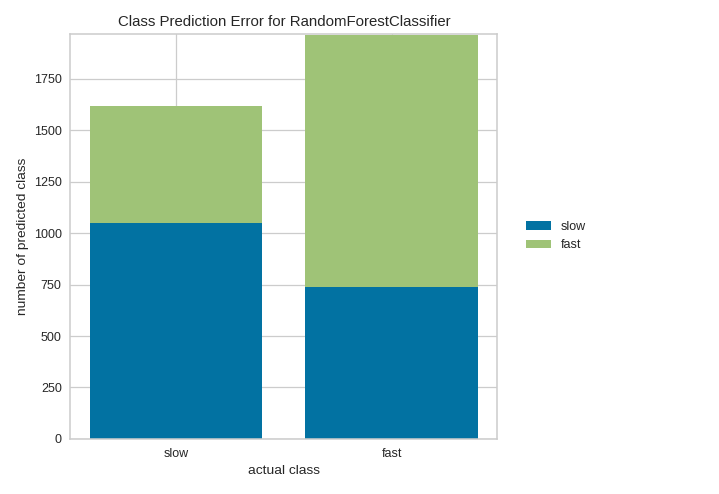

In [10]:
viz = ClassPredictionError(RandomForestClassifier(n_estimators=190, n_jobs=-1, max_depth=5), classes=['slow','fast'])
viz.fit(X_train, y_train.values.ravel())
viz.score(X_test, y_test.values.ravel())
g = viz.poof()

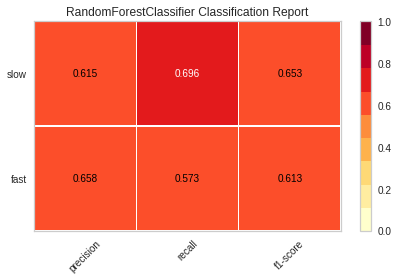

In [41]:
visualizer = ClassificationReport(RandomForestClassifier(n_estimators=190, n_jobs=-1, max_depth=5), classes=['fast', 'slow'])

visualizer.fit(X_train, y_train.values.ravel())  # Fit the training data to the visualizer
visualizer.score(X_test, y_test.values.ravel())  # Evaluate the model on the test data
g = visualizer.poof()

In [43]:
cm = ConfusionMatrix(RandomForestClassifier())
cm.fit(X_train,y_train.values.ravel())
cm.score(X_test, y_test.values.ravel())
cm.poof()

MemoryError: 

In [44]:
visualizer = ROCAUC(GaussianNB())

visualizer.fit(X_train, y_train.values.ravel())  # Fit the training data to the visualizer
visualizer.score(X_test, y_test.values.ravel())  # Evaluate the model on the test data
g = visualizer.poof()   

MemoryError: 

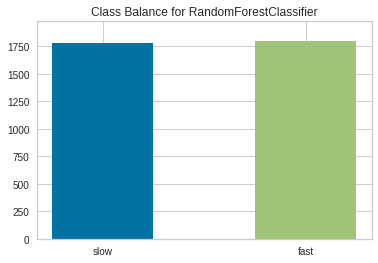

In [7]:
viz = ClassBalance(RandomForestClassifier(), classes=['slow', 'fast'])
viz.fit(X_train, y_train.values.ravel())
viz.score(X_test, y_test.values.ravel())
g = viz.poof()

In [ ]:
viz = ThresholdVisualizer(RandomForestClassifier())
viz.fit(X_train, y_train.values.ravel())
viz.score(X_test, y_test.values.ravel())
g = viz.poof()

<IPython.core.display.Javascript object>


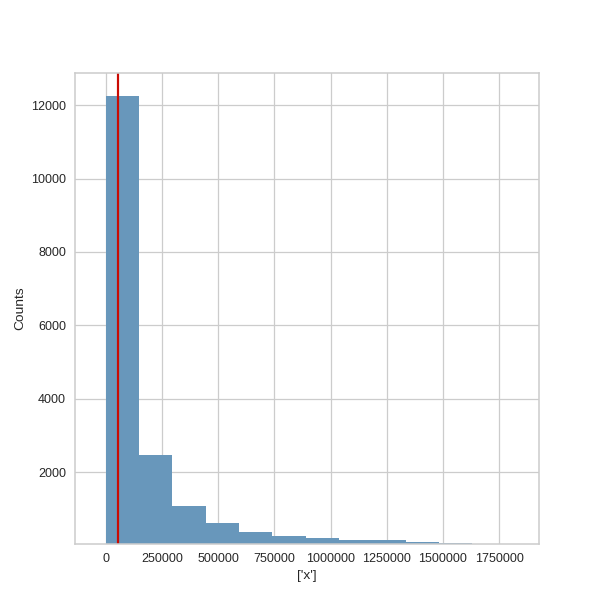

The binning reference values are: [53802]


In [9]:
viz = BalancedBinningReference(bins=2)
viz.fit(m.salesrank)
viz.poof()

In [ ]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
viz = BalancedBinningReference(bins=4)
viz.fit(s)
viz.poof()

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train.values.ravel())
y_pred = clf.predict(X_test)

In [ ]:
m[['amazon_sales_price', 'date', 'image', 'margin', 'model',
       'pagelink', 'profit', 'purchaseprice', 'salesrank',
       'store', 'title', 'upc', 'brand',
       'length', 'width', 'height', 'manufacturer', 'max_age', 'min_age',
       'bins_rank']].head()

In [ ]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)


In [ ]:
x

In [ ]:
'''
le = LabelEncoder()
ohe = OneHotEncoder(sparse=False)
# m['brand_le'] = le.fit_transform(m['brand'])
# m['brand_ohe'] = ohe.fit_transform(m['brand_le'].values.reshape((m.brand.shape[0]),1))
m['brand_le'] = le.fit_transform(m['brand'])
m['brand_ohe'] = ohe.fit_transform(m['brand_le'].values.reshape((m.brand_le.shape[0]),1))

le = LabelEncoder()
ohe = OneHotEncoder(sparse=True)
#m['store_le'] = le.fit_transform(m['store'])
#m['store_ohe'] = ohe.fit_transform(m['store_le'].values.reshape(m.store.shape[0],1)).toarray()
m['store_le'] = le.fit_transform(m['store'])
m['store_ohe'] = ohe.fit_transform(m['store_le'].values.reshape(-1,1))
'''
